In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display
from matplotlib.animation import FuncAnimation, PillowWriter
import os
import imageio
from tqdm.notebook import tqdm_notebook
from matplotlib.animation import FuncAnimation 
import matplotlib

# Marking

In [55]:
'''
This cell of the notenook is highly personalizable (until a proper MySQL database is properly set up!), it basically consists in correctly reading the race outcomes' results
and correctly process it.
'''


nRacesWomen = 20
results = pd.read_excel('../../data/WC2023-Results.xlsx', index_col = 3, sheet_name='GenF', header = [1, 2])
#results.reset_index()
results.columns = list(map(lambda x: x[0] + '_' + x[1], list(results.columns)))
natDict = dict(zip(results.index, results['CLASSIFICA_NAZ.']))
columnsErase = list(filter(lambda x: x.find('Unnamed') != -1, list(results.columns)))
columnsErase += ['HOL_MS.1', 'HOL_PU', 'CLASSIFICA_NAZ.'] # Eliminating cancelled race, unused column and nationality
results = results.drop(columns = columnsErase)
results = results.iloc[:,:nRacesWomen]
results = results.fillna(0)
transposedResults = results.transpose()
transposedResults = transposedResults.astype(int)
resultsCumulative = transposedResults.cumsum(axis = 0)
resultsCumulative.index = resultsCumulative.index.set_names(['race'])
resultsCumulative.head()

"\nThis cell of the notenook is highly personalizable (until a proper MySQL database is properly set up!), it basically consists in correctly reading the race outcomes' results\nand correctly process it.\n"

,AKHATOVA L.,ANDERSSON S.,ARNEKLEIV J.,AUCHENTALLER H.,AVVAKUMOVA E.,BASERGA A.,BATOVSKA-F.,BENDIKA B.,BIELECKA D.,BILOSIUK O.,...,VOBORNIKOVA T.,VOIGT V.,WEIDEL A.,WEN Y.,WIERER D.,YEGOROVA P.,ZDOUC D.,ZDRAVKOVA M.,ZORC K.,ZUK K.
race,,,,,,,,,,,,,,,,,,,,,
KON_IN,0,0,0,0,0,5,34,0,0,0,...,19,50,15,0,3,0,8,0,0,0
KON_SP,0,0,0,0,0,5,49,13,0,0,...,19,80,60,0,35,0,8,0,0,0
KON_PU,0,0,0,0,0,5,60,23,0,0,...,19,114,84,0,110,0,16,0,0,0
HOC_SP,0,0,0,0,0,5,72,43,0,0,...,19,125,103,0,146,0,23,0,0,0
HOC_PU,0,0,0,0,0,5,103,43,0,0,...,19,152,129,0,174,0,23,0,0,0


In [56]:
indexCumulativeList = list(resultsCumulative.index)
uniqueIndexes = np.unique(np.array(list(reversed(list(map(lambda x : x.split('_')[0],\
                                                     indexCumulativeList))))), return_index = True)[1]

rowsToKeep = len(indexCumulativeList) - uniqueIndexes - 1
rowsToKeep = np.sort(rowsToKeep)

In [64]:
'''
This cell is subject to change, specifically the starting stage has to change whenever it's necessary.
This and all the code below might have to be all enclosed into a function in the future with properly choosen arguments.
'''

stageDf = resultsCumulative.iloc[rowsToKeep,:]
stageIndex = list(stageDf.index)
startingStage = stageIndex.index('KON_PU')
stageDf = stageDf.iloc[startingStage: startingStage + 2,:]
stageDf.head()

"\nThis cell is subject to change, specifically the starting stage has to change whenever it's necessary.\nThis and all the code below might have to be all enclosed into a function in the future with properly choosen arguments.\n"

,AKHATOVA L.,ANDERSSON S.,ARNEKLEIV J.,AUCHENTALLER H.,AVVAKUMOVA E.,BASERGA A.,BATOVSKA-F.,BENDIKA B.,BIELECKA D.,BILOSIUK O.,...,VOBORNIKOVA T.,VOIGT V.,WEIDEL A.,WEN Y.,WIERER D.,YEGOROVA P.,ZDOUC D.,ZDRAVKOVA M.,ZORC K.,ZUK K.
race,,,,,,,,,,,,,,,,,,,,,
KON_PU,0,0,0,0,0,5,60,23,0,0,...,19,114,84,0,110,0,16,0,0,0
HOC_PU,0,0,0,0,0,5,103,43,0,0,...,19,152,129,0,174,0,23,0,0,0


In [65]:
intermediateSteps = 35
assert len(stageDf) == 2, "We should have a dataFrame with only two rows: the situation at the start of stage and the situation at the end"
dfTransition = stageDf.copy()
dfTransition = dfTransition.reset_index()
dfTransition.index = dfTransition.index * intermediateSteps
lastIdx = dfTransition.index[-1] + 1
dfExpanded = dfTransition.reindex(range(lastIdx))

dfExpandedtmp = dfTransition.reindex(range(lastIdx))
dfExpanded['race'] = dfExpanded['race'].fillna(method='ffill')

dfExpanded2 = dfExpandedtmp.fillna(method='ffill')
dfExpanded3 = dfExpandedtmp.fillna(method='backfill')
dfExpanded = dfExpanded.set_index('race')
dfExpanded2 = dfExpanded2.set_index('race')
dfExpanded3 = dfExpanded3.set_index('race')
dfExpanded3.iloc[0,:] = dfExpanded3.iloc[1,:]
dfExpanded.head()

,AKHATOVA L.,ANDERSSON S.,ARNEKLEIV J.,AUCHENTALLER H.,AVVAKUMOVA E.,BASERGA A.,BATOVSKA-F.,BENDIKA B.,BIELECKA D.,BILOSIUK O.,...,VOBORNIKOVA T.,VOIGT V.,WEIDEL A.,WEN Y.,WIERER D.,YEGOROVA P.,ZDOUC D.,ZDRAVKOVA M.,ZORC K.,ZUK K.
race,,,,,,,,,,,,,,,,,,,,,
KON_PU,0.0,0.0,0.0,0.0,0.0,5.0,60.0,23.0,0.0,0.0,...,19.0,114.0,84.0,0.0,110.0,0.0,16.0,0.0,0.0,0.0
KON_PU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_PU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_PU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_PU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
dfRankExpanded = dfExpanded.rank(axis = 1, method = 'first')
dfRankExpanded2 = dfExpanded2.rank(axis = 1, method = 'first')
dfRankExpanded.head()

,AKHATOVA L.,ANDERSSON S.,ARNEKLEIV J.,AUCHENTALLER H.,AVVAKUMOVA E.,BASERGA A.,BATOVSKA-F.,BENDIKA B.,BIELECKA D.,BILOSIUK O.,...,VOBORNIKOVA T.,VOIGT V.,WEIDEL A.,WEN Y.,WIERER D.,YEGOROVA P.,ZDOUC D.,ZDRAVKOVA M.,ZORC K.,ZUK K.
race,,,,,,,,,,,,,,,,,,,,,
KON_PU,1.0,2.0,3.0,4.0,5.0,96.0,129.0,110.0,6.0,7.0,...,107.0,137.0,133.0,88.0,136.0,89.0,105.0,90.0,91.0,92.0
KON_PU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_PU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_PU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_PU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
interpolationMethod = 'linear'

dfRankExpanded = dfRankExpanded.interpolate(method = interpolationMethod)
dfExpanded = dfExpanded.interpolate(method = interpolationMethod)
dfRankExpanded2 = dfRankExpanded2.ffill()
dfRankExpanded.head()

,AKHATOVA L.,ANDERSSON S.,ARNEKLEIV J.,AUCHENTALLER H.,AVVAKUMOVA E.,BASERGA A.,BATOVSKA-F.,BENDIKA B.,BIELECKA D.,BILOSIUK O.,...,VOBORNIKOVA T.,VOIGT V.,WEIDEL A.,WEN Y.,WIERER D.,YEGOROVA P.,ZDOUC D.,ZDRAVKOVA M.,ZORC K.,ZUK K.
race,,,,,,,,,,,,,,,,,,,,,
KON_PU,1.0,2.0,3.0,4.0,5.0,96.000000,129.000000,110.000000,6.0,7.0,...,107.000000,137.000000,133.000000,88.000000,136.0,89.000000,105.000000,90.000000,91.000000,92.000000
KON_PU,1.0,2.0,3.0,4.0,5.0,95.771429,129.028571,110.057143,6.0,7.0,...,106.771429,136.942857,133.028571,87.771429,136.0,88.771429,104.914286,89.771429,90.771429,91.771429
KON_PU,1.0,2.0,3.0,4.0,5.0,95.542857,129.057143,110.114286,6.0,7.0,...,106.542857,136.885714,133.057143,87.542857,136.0,88.542857,104.828571,89.542857,90.542857,91.542857
KON_PU,1.0,2.0,3.0,4.0,5.0,95.314286,129.085714,110.171429,6.0,7.0,...,106.314286,136.828571,133.085714,87.314286,136.0,88.314286,104.742857,89.314286,90.314286,91.314286
KON_PU,1.0,2.0,3.0,4.0,5.0,95.085714,129.114286,110.228571,6.0,7.0,...,106.085714,136.771429,133.114286,87.085714,136.0,88.085714,104.657143,89.085714,90.085714,91.085714


In [68]:
converter = {'KON': 'Kontiolahti', 'HOC': 'Hochfilzen', 'LGB': 'Annecy', 'POK': 'Pokljuka', 'RUH': 'Ruhpolding',\
             'ANT': 'Anterselva', 'NMĚ': 'Nove Mesto', 'ÖST': 'Ostersund', 'HOL': 'Holmenkollen',\
                'IN': 'Individuale', 'PU': 'Inseguimento', 'SP': 'Sprint', 'MS': 'Mass Start'}
colorsDict = {'RUS':['blue', 'red'], 'NOR':['firebrick', 'mediumblue'], 'GER':['orange', 'black'],
'BLR':['red', 'forestgreen'], 'UKR':['deepskyblue', 'darkkhaki'], 'SWE':['dodgerblue', 'gold'], 'FRA':['darkblue', 'darkblue'],
'ITA':['dodgerblue', 'dodgerblue'],'CZE':['royalblue', 'red'],'FIN':['white', 'mediumblue'],'CAN':['red', 'white'],
'SVK':['red', 'blue'],'KAZ':['skyblue', 'khaki'],'POL':['white', 'orangered'], 'SUI':['white', 'red'],'AUT':['white', 'firebrick'],
'JPN':['white', 'firebrick'],'SLO':['blue', 'white'],'USA':['firebrick', 'navy'],'EST':['black', 'steelblue'],'BUL':['darkgreen', 'red'],
'LAT':['brown', 'white'],'ROU':['blue', 'gold'], 'LTU':['forestgreen', 'gold'], 'CHN':['red', 'yellow'], 'MDA':['mediumblue', 'orangered'],
'BEL':['black', 'gold'], 'KOR':['white', 'firebrick'], 'CRO':['white', 'red'], 'GBR':['navy', 'red'], 'AUS':['gold', 'gold'], 
'ARM':['blue', 'gold'], 'SRB':['white', 'midnightblue'], 'ESP':['red', 'yellow'],
  'NZL':['black', 'white'], 'AND':['mediumblue', 'gold'], 'GRL':['red', 'white']}

(140.5, 145.5)

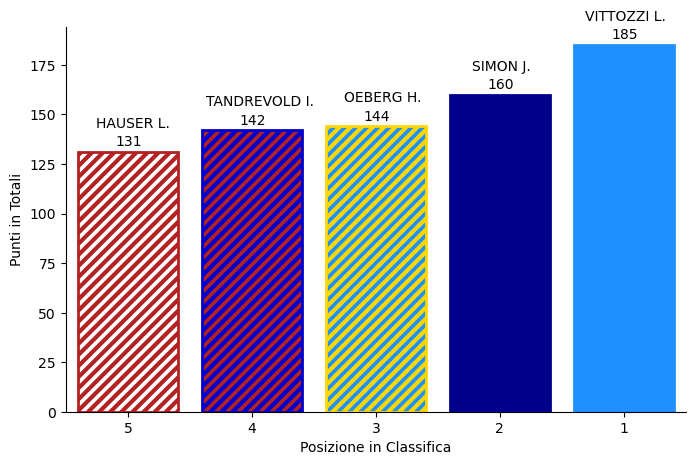

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
colorBack = matplotlib.colors.to_rgba('lightskyblue', alpha = 0.5)
labels = dfExpanded.columns
img = matplotlib.image.imread('poweredBy.jpg')
for i, ax in enumerate([ax], start = 0):
    names = list(reversed(sorted(dict(dfRankExpanded.iloc[i]).items(), key = lambda x: x[1])))[:6]
    x = dfRankExpanded.iloc[i]
    
    height = dfExpanded.iloc[i]
    heightsPlotted = np.sort(np.array(height))[::-1][:6]
    widthsPlotted = np.sort(np.array(x))[::-1][:6]
    maxHeight = np.max(height)
    nations = []
    for i in range(5):
        _ = ax.text(x = x[names[i][0]] - len(names[i][0])/35, y = height[names[i][0]] + np.max(heightsPlotted)/15 , s = names[i][0], fontsize = 10);
        nations.append(natDict[names[i][0]])
        _ = ax.text(x = x[names[i][0]] - 0.1, y = height[names[i][0]] + np.max(heightsPlotted)/60,\
                   s ='{points:.0f}'.format(points = heightsPlotted[i]))
    annotations = list(map(lambda x: converter[x], dfRankExpanded.index[i].split('_')))
#    ax.text(f'{annotations[1]}\n{annotations[0]}', (np.max(widthsPlotted), np.min(heightsPlotted) + 1), fontsize = 20)
    #ax.text(np.max(widthsPlotted)-maxWidth/5 ,np.min(heightsPlotted) + 1, f'{annotations[1]} di\n{annotations[0]}', fontsize = 20,\
     #       bbox=dict(facecolor=colorBack, edgecolor= 'black', linewidth=2, boxstyle='round,pad=0.5'))
#    ax.set_title(f'{annotations[1]} di {annotations[0]}', fontsize = 20)
    barList = ax.bar(x = x, height = height, width = 0.8)
#    ax.imshow(img, extent=[maxHeight ,maxHeight + maxWidth/4, 139 + 0.1 , 139+1.1], aspect='auto')
    ax.set_xlim(left = len(x) - 4.5, right = len(x) + 0.5)
    #ax.set_ylim(bottom = 0, top = 5 + 0.5)
 #   ax.set_xlim(left = 0, right = maxWidth + maxWidth/4)
    
    colorsList = [colorsDict[nat] for nat in nations]
    primaryColors = list(map(lambda x: x[0], colorsList))
    secondaryColors = list(map(lambda x: x[1], colorsList))
    #print(counts_per_ath['primary_color'])
    for bar, height, width, main_color, hatch_color in zip([barList[i] for i in range(1, 7)], heightsPlotted,\
                                                           widthsPlotted, primaryColors, secondaryColors):
        
        #print(list(zip(ax.containers[0][:5:-1], counts_per_ath['primary_color'], counts_per_ath['secondary_color'])))
        #print(list(reversed(ax.containers[0])))
        rect = matplotlib.patches.Rectangle((width - 0.4, 0), 0.8, height, hatch='///', linewidth=0)
        rect.set_facecolor(main_color)
        rect.set_edgecolor(hatch_color)
        rect.set_linewidth(2)
        _ = ax.add_patch(rect)
        matplotlib.rcParams['hatch.linewidth'] = 3
        #bar.set_facecolor(main_color)
        #bar.set_edgecolor(hatch_color)
        #bar.set_hatch('//')

    # Setting tick labels
    _ = ax.set_xticks(range(len(x) - 4, len(x) + 1), labels = reversed(range(1, 6)))
    ax.spines[['right', 'top']].set_visible(False)
    _ = ax.set_xlabel('Posizione in Classifica')
    _ = ax.set_ylabel('Punti in Totali')
plt.show()

In [72]:
# frames between transitions

n_frames = 1
nIndex = len(dfExpanded.index)
labels = dfExpanded.columns
print('Creating charts\n')
filenames = []
path = '../../'
for stage in tqdm_notebook(np.arange(0, 1)):#nIndex // intermediateSteps)):    

    for j in range(intermediateSteps):
        if j == intermediateSteps - 1:
            rangeFrames = 5
        else:
            rangeFrames = 1
        for i in np.arange(0, rangeFrames):
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 5))
            #names = list(reversed(sorted(dict(expandedRank.iloc[stage + j]).items(), key = lambda x: x[1])))[:5]                
            x = dfRankExpanded2.iloc[stage * intermediateSteps + j]
            height = dfExpanded.iloc[stage * intermediateSteps + j]
            if j == 0:
                names = list(reversed(sorted(dict(dfRankExpanded2.iloc[stage + j]).items(), key = lambda x: x[1])))[:5] 
                heightsPlotted = np.sort(np.array(height))[::-1][:5]
            
                widthsPlotted = np.sort(np.array(x))[::-1][:5]
            
            
            maxHeight = np.max(height)
            #print(np.sort(np.array(width))[::-1])
            barList = ax.bar(x = x, height = height, width = 0.8)
            #print(x, height)
            nations = []
            for k in range(5):
                _ = ax.text(x = x[names[k][0]] - len(names[k][0])/35, y = height[names[k][0]] + np.max(heightsPlotted)/15 , s = names[k][0], fontsize = 10)
                nations.append(natDict[names[k][0]])
                _ = ax.text(x = x[names[k][0]] - 0.1, y = height[names[k][0]] + np.max(heightsPlotted)/60,\
                        s ='{points:.0f}'.format(points = [height[names[s][0]] for s in range(5)][k]))
        

        
        
            _ = ax.set_xlim(left = len(x) - 4.5, right = len(x) + 0.5)
        
            colorsList = [colorsDict[nat] for nat in nations]
            primaryColors = list(map(lambda x: x[0], colorsList))
            secondaryColors = list(map(lambda x: x[1], colorsList))
            
            for bar, height, width, main_color, hatch_color in zip([barList[l] for l in range(1, 6)], [height[names[s][0]] for s in range(5)],\
                                                                [x[names[s][0]] for s in range(5)], primaryColors, secondaryColors):
                
                
                rect = matplotlib.patches.Rectangle((width - 0.4, 0), 0.8, height, hatch='///', linewidth=0)
                rect.set_facecolor(main_color)
                rect.set_edgecolor(hatch_color)
                rect.set_linewidth(2)
                _ = ax.add_patch(rect)
                matplotlib.rcParams['hatch.linewidth'] = 3

            _ = ax.set_xticks(range(len(x) - 4, len(x) + 1), labels = reversed(range(1, 6)))
            _ = ax.spines[['right', 'top']].set_visible(False)
            _ = ax.set_xlabel('Posizione in Classifica')
            _ = ax.set_ylabel('Punti in Totali')
            # build file name and append to list of file names
            filename = f'frame_{j}_{i}.png'
            filenames.append(path + filename)        
            plt.savefig(path + filename)
            plt.close()









# frames between transitions


nIndex = len(dfExpanded.index)
labels = dfExpanded.columns
#filenames = []
path = '../../'
for stage in tqdm_notebook(np.arange(0, 1)):#nIndex // intermediateSteps)):    

    for j in range(intermediateSteps + 1):
        if j == intermediateSteps:
            rangeFrames = 10
        else:
            rangeFrames = 1
        for i in np.arange(0, rangeFrames):
            
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 5))
            #names = list(reversed(sorted(dict(expandedRank.iloc[stage + j]).items(), key = lambda x: x[1])))[:5]                
            x = dfRankExpanded.iloc[stage * intermediateSteps + j]
            height = dfExpanded3.iloc[stage * intermediateSteps + j]
            
            names = list(reversed(sorted(dict(dfRankExpanded.iloc[stage + j]).items(), key = lambda x: x[1])))[:5] 
            idxSort = np.argsort(np.array(height))[::-1]
            heightsPlotted_ = np.sort(np.array(height))[::-1][:5]
            heightsPlotted = np.array(height)[idxSort][:5]
            
            widthsPlotted_ = np.sort(np.array(x))[::-1][:5]
            widthsPlotted = np.array(x)[idxSort][:5]
            
            
            
            maxHeight = np.max(height)
            #print(np.sort(np.array(width))[::-1])
            barList = ax.bar(x = x, height = height, width = 0.8)
            #print(x, height)
            nations = []
            for k in range(5):
                _ = ax.text(x = x[names[k][0]] - len(names[k][0])/35, y = height[names[k][0]] + np.max(heightsPlotted)/15 , s = names[k][0], fontsize = 10)
                nations.append(natDict[names[k][0]])
                _ = ax.text(x = x[names[k][0]] - 0.1, y = height[names[k][0]] + np.max(heightsPlotted)/60,\
                        s ='{points:.0f}'.format(points = [height[names[s][0]] for s in range(5)][k]))
        
    #ax.text(f'{annotations[1]}\n{annotations[0]}', (np.max(widthsPlotted), np.min(heightsPlotted) + 1), fontsize = 20)
    #ax.text(np.max(widthsPlotted)-maxWidth/5 ,np.min(heightsPlotted) + 1, f'{annotations[1]} di\n{annotations[0]}', fontsize = 20,\
    #       bbox=dict(facecolor=colorBack, edgecolor= 'black', linewidth=2, boxstyle='round,pad=0.5'))
        
            
            _ = ax.set_xlim(left = len(x) - 4.5, right = len(x) + 0.5)

            colorsList = [colorsDict[nat] for nat in nations]
            
            primaryColors = list(map(lambda x: x[0], colorsList))
            secondaryColors = list(map(lambda x: x[1], colorsList))
            
            #plt.title(f'Epoch {j}', fontsize=16);
            #plt.xlabel('Digit', fontsize=14)
            #plt.ylabel('Estimated probability', fontsize=14)
            #plt.grid(alpha=0.5, axis='y')
            for bar, height, width, main_color, hatch_color in zip([barList[l] for l in range(1, 6)], [height[names[l][0]] for l in range(5)],\
                                                                [x[names[l][0]] for l in range(5)], primaryColors, secondaryColors):
                
                #print(list(zip(ax.containers[0][:5:-1], counts_per_ath['primary_color'], counts_per_ath['secondary_color'])))
                #print(list(reversed(ax.containers[0])))
                rect = matplotlib.patches.Rectangle((width - 0.4, 0), 0.8, height, hatch='///', linewidth=0)
                rect.set_facecolor(main_color)
                rect.set_edgecolor(hatch_color)
                rect.set_linewidth(2)
                _ = ax.add_patch(rect)
                matplotlib.rcParams['hatch.linewidth'] = 3

            _ = ax.set_xticks(range(len(x) - 4, len(x) + 1), labels = reversed(range(1, 6)))
            _ = ax.spines[['right', 'top']].set_visible(False)
            _ = ax.set_xlabel('Posizione in Classifica')
            _ = ax.set_ylabel('Punti in Totali')
            # build file name and append to list of file names
            filename = f'frame_bis_{j}_{i}.png'
            filenames.append(path + filename)
            # last frame of each viz stays longer 
            #if (i == n_frames):
            #   for i in range(1):
            #      filenames.append(filename)
            # save img
            plt.savefig(path + filename)
            plt.close()

# Build GIF

with imageio.get_writer('changeRanking.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)


# Remove files
for filename in set(filenames):
    os.remove(filename)



Creating charts



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_1052/920098359.py:179: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


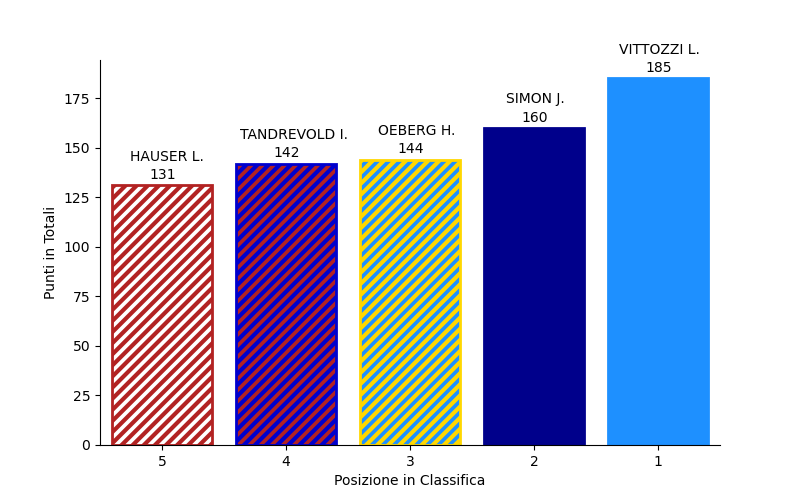

In [73]:
gifPath = 'changeRanking.gif'
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')